In [1]:
import matplotlib
import tensorflow as tf
import PIL
#from Cython import inline
from PIL import Image
import os
from tensorflow.keras.preprocessing import image
import tensorflow.keras as keras
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
#%matplotlib inline
import seaborn as sns
sns.set(style="whitegrid")
import os
import glob as gb
import cv2
import keras

In [2]:


trainpath = 'C:\studextra\choose_your_own\cvi_project_data/seg_train/'
testpath = 'C:\studextra\choose_your_own\cvi_project_data/seg_test/'
predpath = 'C:\studextra\choose_your_own\cvi_project_data/seg_pred/'





In [3]:
for folder in  os.listdir(trainpath + 'seg_train') :
    files = gb.glob(pathname= str( trainpath +'seg_train//' + folder + '/*.jpg'))
    print(f'For training data , found {len(files)} in folder {folder}')
for folder in  os.listdir(testpath +'seg_test') :
    files = gb.glob(pathname= str( testpath +'seg_test//' + folder + '/*.jpg'))
    print(f'For testing data , found {len(files)} in folder {folder}')
files = gb.glob(pathname= str(predpath +'seg_pred/*.jpg'))
print(f'For Prediction data , found {len(files)}')


For training data , found 2191 in folder buildings
For training data , found 2271 in folder forest
For training data , found 2404 in folder glacier
For training data , found 2512 in folder mountain
For training data , found 2274 in folder sea
For training data , found 2382 in folder street
For testing data , found 437 in folder buildings
For testing data , found 474 in folder forest
For testing data , found 553 in folder glacier
For testing data , found 525 in folder mountain
For testing data , found 510 in folder sea
For testing data , found 501 in folder street
For Prediction data , found 7301


In [4]:
code_to_num = {'buildings':0 ,'forest':1, 'glacier':2, 'mountain':3, 'sea':4, 'street':5}
num_to_code = {0:'buildings' ,1:'forest', 2:'glacier', 3:'mountain', 4:'sea', 5:'street'}

def get_code(n) : 
    if n in num_to_code:
        return num_to_code[n]    

def get_num(c):
    if c in code_to_num:
        return code_to_num[c] 

In [7]:
size = []
for folder in  os.listdir(trainpath +'seg_train') : 
    files = gb.glob(pathname= str( trainpath +'seg_train//' + folder + '/*.jpg'))
    for file in files: 
        image = plt.imread(file)
        size.append(image.shape)
pd.Series(size).value_counts()

(150, 150, 3)    13986
(113, 150, 3)        7
(135, 150, 3)        3
(111, 150, 3)        3
(143, 150, 3)        2
(134, 150, 3)        2
(123, 150, 3)        2
(146, 150, 3)        2
(136, 150, 3)        2
(144, 150, 3)        2
(142, 150, 3)        2
(108, 150, 3)        2
(97, 150, 3)         1
(115, 150, 3)        1
(124, 150, 3)        1
(140, 150, 3)        1
(141, 150, 3)        1
(149, 150, 3)        1
(81, 150, 3)         1
(103, 150, 3)        1
(131, 150, 3)        1
(76, 150, 3)         1
(100, 150, 3)        1
(120, 150, 3)        1
(145, 150, 3)        1
(102, 150, 3)        1
(119, 150, 3)        1
(147, 150, 3)        1
(105, 150, 3)        1
(133, 150, 3)        1
(110, 150, 3)        1
dtype: int64

In [6]:
size = []
for folder in  os.listdir(testpath +'seg_test') : 
    files = gb.glob(pathname= str( testpath +'seg_test//' + folder + '/*.jpg'))
    for file in files: 
        image = plt.imread(file)
        size.append(image.shape)
pd.Series(size).value_counts()

(150, 150, 3)    2993
(81, 150, 3)        1
(76, 150, 3)        1
(72, 150, 3)        1
(131, 150, 3)       1
(149, 150, 3)       1
(110, 150, 3)       1
(141, 150, 3)       1
dtype: int64

In [8]:
size = []
files = gb.glob(pathname= str(predpath +'seg_pred/*.jpg'))
for file in files: 
    image = plt.imread(file)
    size.append(image.shape)
pd.Series(size).value_counts()

(150, 150, 3)    7288
(108, 150, 3)       1
(133, 150, 3)       1
(131, 150, 3)       1
(144, 150, 3)       1
(149, 150, 3)       1
(124, 150, 3)       1
(143, 150, 3)       1
(374, 500, 3)       1
(126, 150, 3)       1
(139, 150, 3)       1
(129, 150, 3)       1
(112, 150, 3)       1
(100, 150, 3)       1
dtype: int64

In [9]:
s = 100

In [10]:
X_train = []
y_train = []
for folder in  os.listdir(trainpath +'seg_train') : 
    files = gb.glob(pathname= str( trainpath +'seg_train//' + folder + '/*.jpg'))
    for file in files: 
        image = cv2.imread(file)
        image_array = cv2.resize(image , (s,s))
        X_train.append(list(image_array))
        y_train.append(get_num(folder))

In [11]:
print(f'we have {len(X_train)} items in X_train')

we have 14034 items in X_train


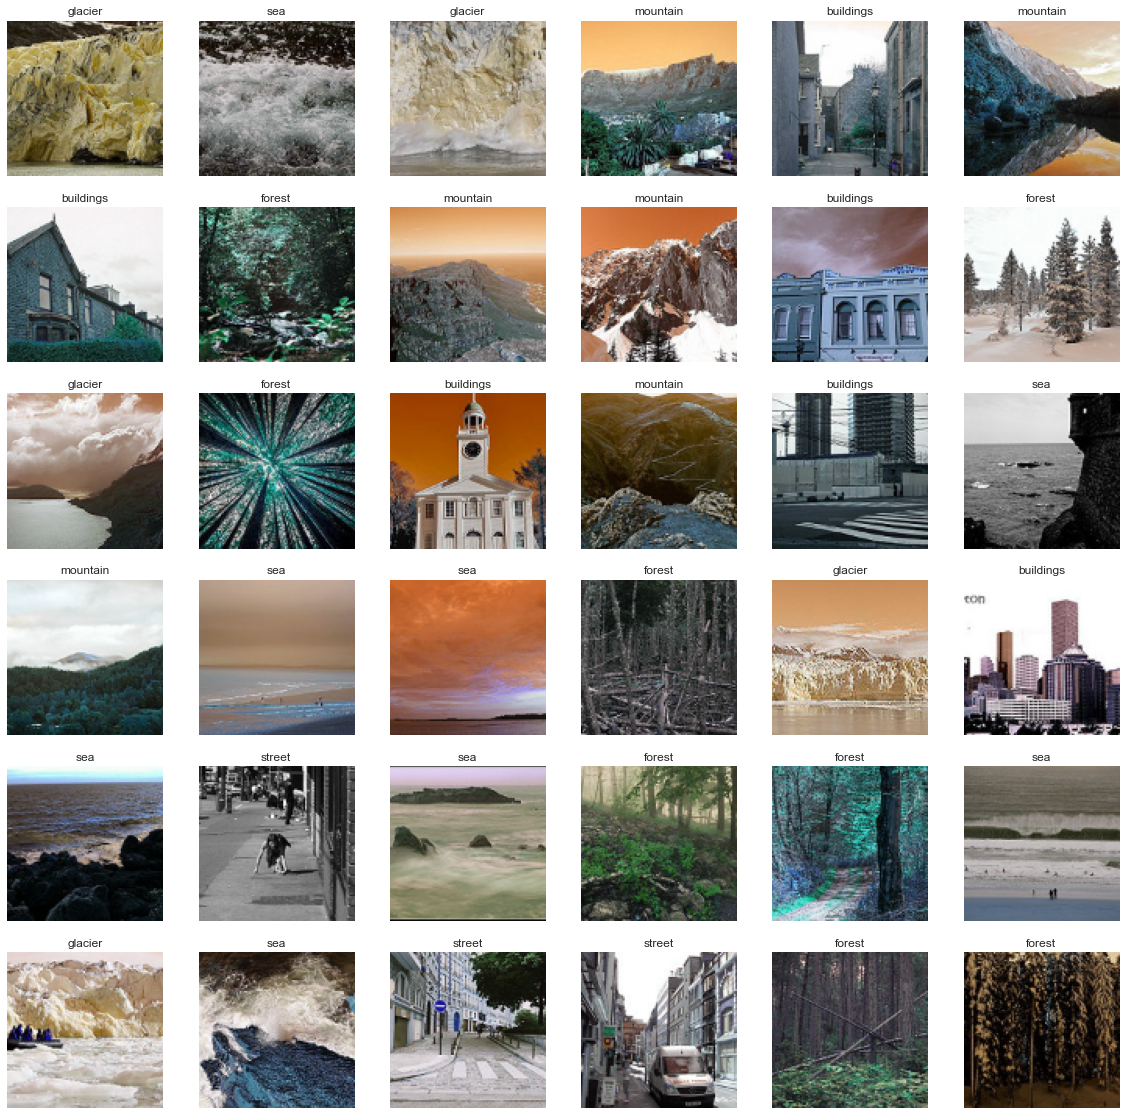

In [12]:
plt.figure(figsize=(20,20))
for n , i in enumerate(list(np.random.randint(0,len(X_train),36))) : 
    plt.subplot(6,6,n+1)
    plt.imshow(X_train[i])   
    plt.axis('off')
    plt.title(get_code(y_train[i]))

In [13]:
X_test = []
y_test = []
for folder in  os.listdir(testpath +'seg_test') : 
    files = gb.glob(pathname= str(testpath + 'seg_test//' + folder + '/*.jpg'))
    for file in files: 
        image = cv2.imread(file)
        image_array = cv2.resize(image , (s,s))
        X_test.append(list(image_array))
        y_test.append(get_num(folder))
        

In [14]:
print(f'we have {len(X_test)} items in X_test')

we have 3000 items in X_test


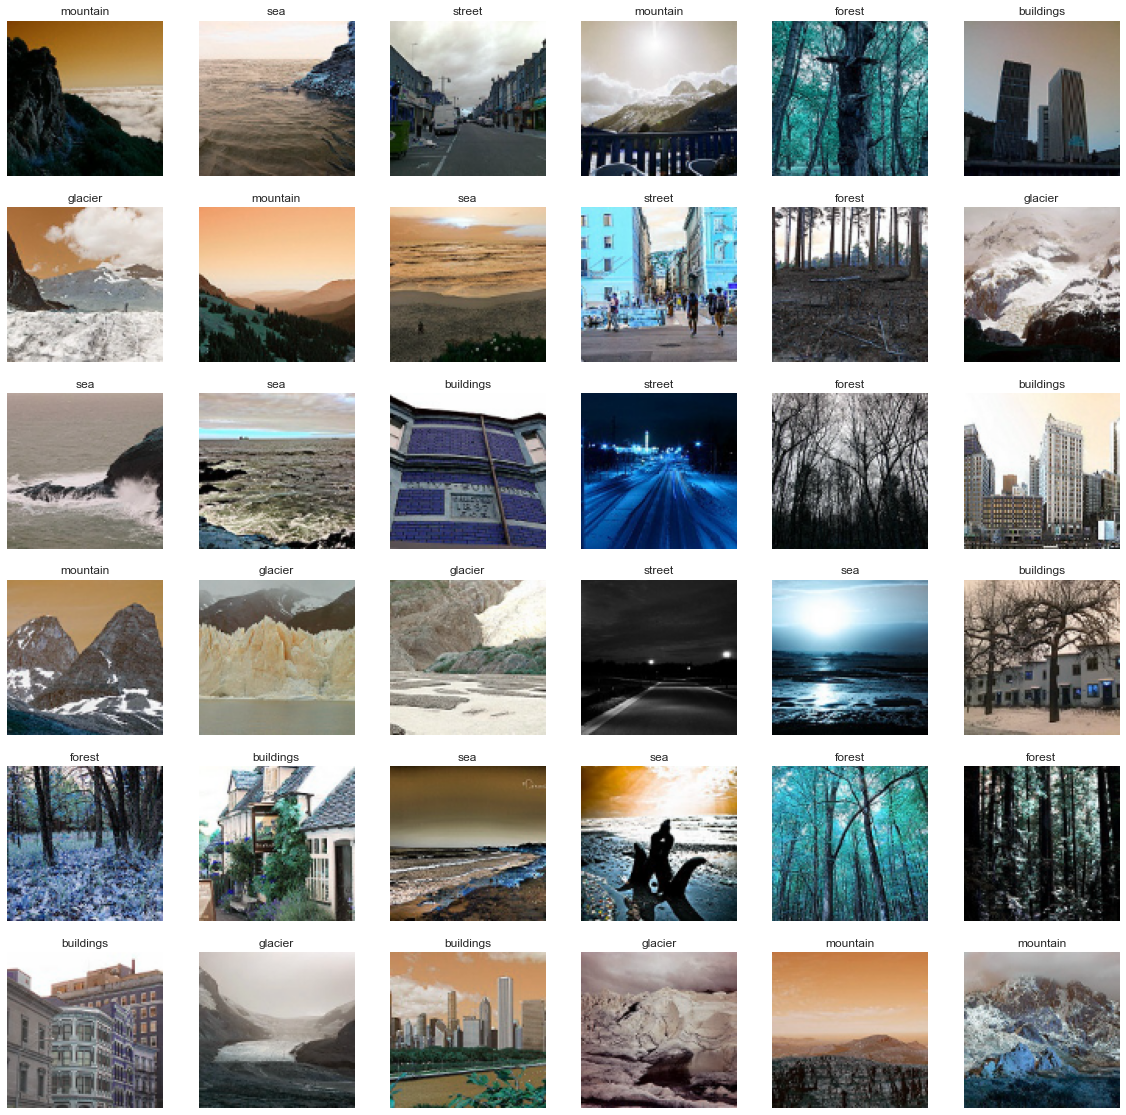

In [15]:
plt.figure(figsize=(20,20))
for n , i in enumerate(list(np.random.randint(0,len(X_test),36))) : 
    plt.subplot(6,6,n+1)
    plt.imshow(X_test[i])    
    plt.axis('off')
    plt.title(get_code(y_test[i]))

In [16]:
X_pred = []
files = gb.glob(pathname= str(predpath + 'seg_pred/*.jpg'))
for file in files: 
    image = cv2.imread(file)
    image_array = cv2.resize(image , (s,s))
    X_pred.append(list(image_array))     

In [17]:
print(f'we have {len(X_pred)} items in X_pred')

we have 7301 items in X_pred


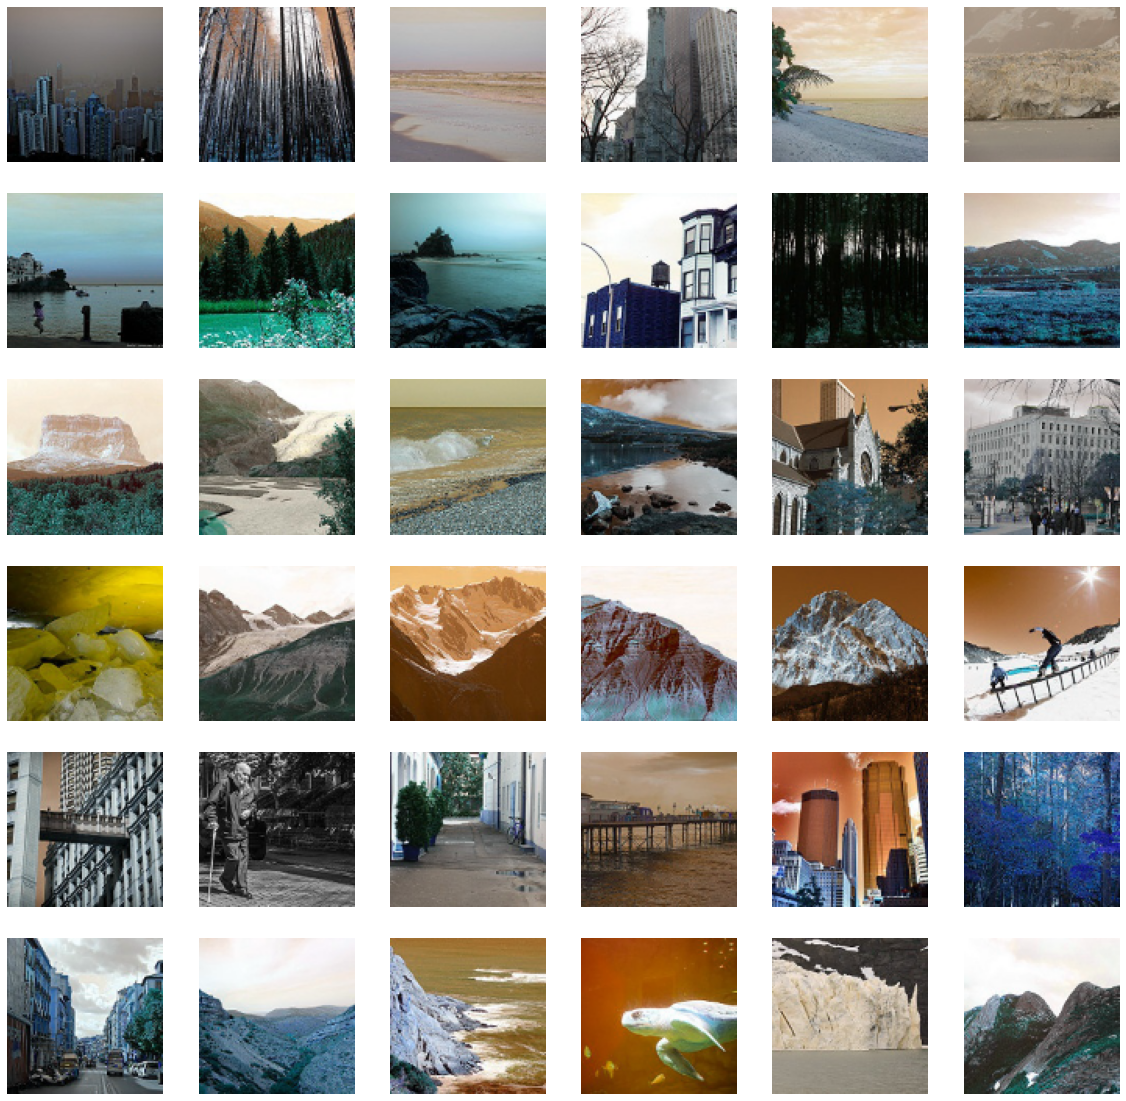

In [18]:
plt.figure(figsize=(20,20))
for n , i in enumerate(list(np.random.randint(0,len(X_pred),36))) : 
    plt.subplot(6,6,n+1)
    plt.imshow(X_pred[i])    
    plt.axis('off')

In [60]:
X_train[0]

array([[[245, 247, 247],
        [246, 248, 248],
        [246, 248, 248],
        ...,
        [248, 248, 248],
        [247, 248, 248],
        [245, 247, 247]],

       [[244, 246, 246],
        [245, 247, 247],
        [245, 247, 247],
        ...,
        [248, 248, 248],
        [247, 248, 248],
        [245, 247, 247]],

       [[244, 246, 246],
        [245, 247, 247],
        [245, 247, 247],
        ...,
        [249, 249, 249],
        [247, 248, 248],
        [245, 247, 247]],

       ...,

       [[ 52,  54,  55],
        [ 75,  77,  78],
        [ 67,  69,  70],
        ...,
        [ 69,  72,  77],
        [ 49,  52,  57],
        [ 35,  38,  43]],

       [[ 52,  54,  55],
        [ 47,  49,  50],
        [ 97,  99, 100],
        ...,
        [ 68,  71,  76],
        [ 37,  40,  45],
        [ 64,  67,  72]],

       [[ 58,  60,  61],
        [ 52,  54,  55],
        [ 84,  86,  87],
        ...,
        [ 33,  36,  41],
        [ 27,  30,  35],
        [ 48,  51,  56]]

In [19]:
X_train = np.array(X_train)
X_test = np.array(X_test)
X_pred_array = np.array(X_pred)
y_train = np.array(y_train)
y_test = np.array(y_test)

print(f'X_train shape  is {X_train.shape}')
print(f'X_test shape  is {X_test.shape}')
print(f'X_pred shape  is {X_pred_array.shape}')
print(f'y_train shape  is {y_train.shape}')
print(f'y_test shape  is {y_test.shape}')

X_train shape  is (14034, 100, 100, 3)
X_test shape  is (3000, 100, 100, 3)
X_pred shape  is (7301, 100, 100, 3)
y_train shape  is (14034,)
y_test shape  is (3000,)


In [46]:
KerasModel = keras.models.Sequential([
    keras.layers.Conv2D(filters=16, kernel_size=(3, 3), activation='relu', input_shape=(100, 100, 3),padding = "same"),
    keras.layers.MaxPool2D(2,2),
    keras.layers.Conv2D(filters=32, kernel_size=(3, 3), activation='relu',padding = "same"),
    keras.layers.MaxPool2D(2,2),
    keras.layers.Conv2D(filters=64, kernel_size=(3, 3), activation='relu',padding = "same"),
    keras.layers.Flatten(),
    keras.layers.Dense(512,activation='relu'),
    keras.layers.Dense(6,activation='softmax')
]
)


In [47]:
from tensorflow.keras.optimizers import Adam

In [48]:
KerasModel.compile(loss="sparse_categorical_crossentropy",optimizer=Adam(lr= .001),metrics=['accuracy'] )

In [49]:
print('Model Details are : ')
print(KerasModel.summary())

Model Details are : 
Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_23 (Conv2D)           (None, 100, 100, 16)      448       
_________________________________________________________________
max_pooling2d_14 (MaxPooling (None, 50, 50, 16)        0         
_________________________________________________________________
conv2d_24 (Conv2D)           (None, 50, 50, 32)        4640      
_________________________________________________________________
max_pooling2d_15 (MaxPooling (None, 25, 25, 32)        0         
_________________________________________________________________
conv2d_25 (Conv2D)           (None, 25, 25, 64)        18496     
_________________________________________________________________
flatten_7 (Flatten)          (None, 40000)             0         
_________________________________________________________________
dense_14 (Dense)             (Non

In [55]:
ThisModel = KerasModel.fit(X_train,y_train,epochs = 5)

Epoch 1/5
439/439 [==============================] - 112s 255ms/step - loss: 0.5474 - accuracy: 0.8052
Epoch 2/5
439/439 [==============================] - 113s 257ms/step - loss: 0.2881 - accuracy: 0.9029
Epoch 3/5
439/439 [==============================] - 112s 255ms/step - loss: 0.1800 - accuracy: 0.9431
Epoch 4/5
439/439 [==============================] - 109s 248ms/step - loss: 0.1178 - accuracy: 0.9679
Epoch 5/5
439/439 [==============================] - 109s 249ms/step - loss: 0.1252 - accuracy: 0.9623


In [56]:
ModelLoss, ModelAccuracy = KerasModel.evaluate(X_test, y_test)

print('Test Loss is {}'.format(ModelLoss))
print('Test Accuracy is {}'.format(ModelAccuracy ))

94/94 [==============================] - 4s 41ms/step - loss: 1.5222 - accuracy: 0.6950
Test Loss is 1.5222053527832031
Test Accuracy is 0.6949999928474426


In [57]:
y_pred = KerasModel.predict(X_test)

print('Prediction Shape is {}'.format(y_pred.shape))


Prediction Shape is (3000, 6)


In [58]:
y_result = KerasModel.predict(X_pred_array)

print('Prediction Shape is {}'.format(y_result.shape))

Prediction Shape is (7301, 6)


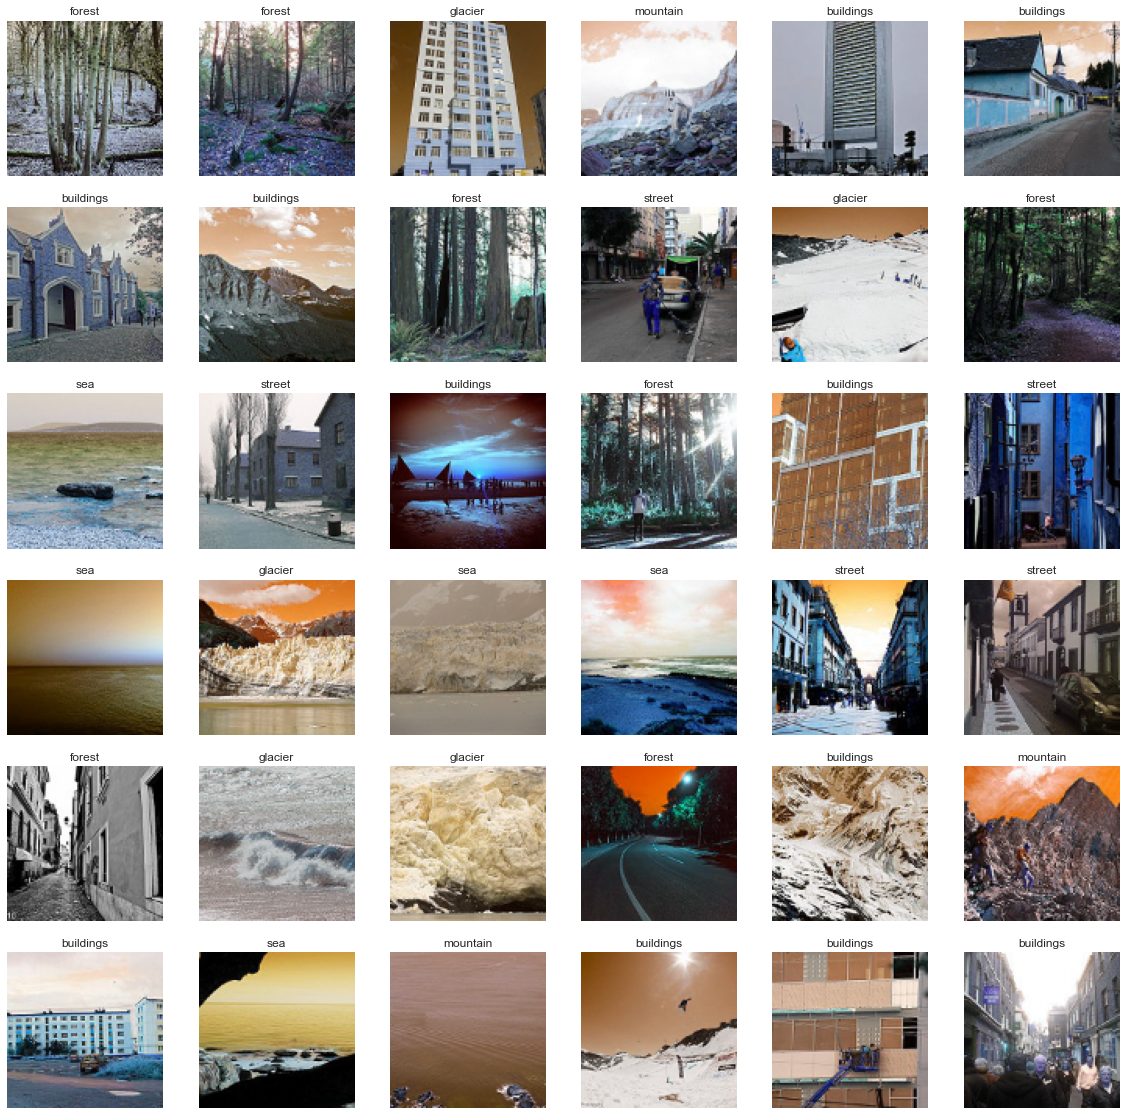

In [59]:
plt.figure(figsize=(20,20))
for n , i in enumerate(list(np.random.randint(0,len(X_pred),36))) : 
    plt.subplot(6,6,n+1)
    plt.imshow(X_pred[i])    
    plt.axis('off')
    plt.title(get_code(np.argmax(y_result[i])))